In [1]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
#a1
# --- Step 1: Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# --- Step 2: Load dataset ---
df = pd.read_csv("Mental Health Dataset.csv")   # replace with your dataset filename

# --- Step 3: Drop unnecessary columns ---
drop_cols = ['Timestamp', 'Country', 'Occupation']
df = df.drop(columns=drop_cols)
print("Remaining Columns:", df.columns.tolist())

# --- Step 4: Encode categorical columns ---
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':   # encode only categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# --- Step 5: Define Features (X) and Target (y) ---
X = df.drop("treatment", axis=1)  # Features
y = df["treatment"]               # Target

# --- Step 6: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 7: Train KNN ---
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# --- Step 8: Predictions ---
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# --- Step 9: Confusion Matrix + Classification Report ---
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nTraining Report:\n", classification_report(y_train, y_train_pred))

print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Report:\n", classification_report(y_test, y_test_pred))


Remaining Columns: ['Gender', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

Training Confusion Matrix:
 [[68121 33108]
 [32752 70673]]

Training Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67    101229
           1       0.68      0.68      0.68    103425

    accuracy                           0.68    204654
   macro avg       0.68      0.68      0.68    204654
weighted avg       0.68      0.68      0.68    204654


Test Confusion Matrix:
 [[27491 16038]
 [15756 28425]]

Test Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63     43529
           1       0.64      0.64      0.64     44181

    accuracy                           0.64     87710
   macro avg       0.64      0.64   

STARTING QUESTION A3: GENERATE TRAINING DATA & PLOT
Generated 20 data points (first 5 rows):
   Feature_X  Feature_Y
0   4.370861   6.506676
1   9.556429   2.255445
2   7.587945   3.629302
3   6.387926   4.297257
4   2.404168   5.104630

Data points with assigned classes (first 5 rows):
   Feature_X  Feature_Y  Class
0   4.370861   6.506676      1
1   9.556429   2.255445      1
2   7.587945   3.629302      1
3   6.387926   4.297257      1
4   2.404168   5.104630      0

Class distribution:
Class
1    13
0     7
Name: count, dtype: int64


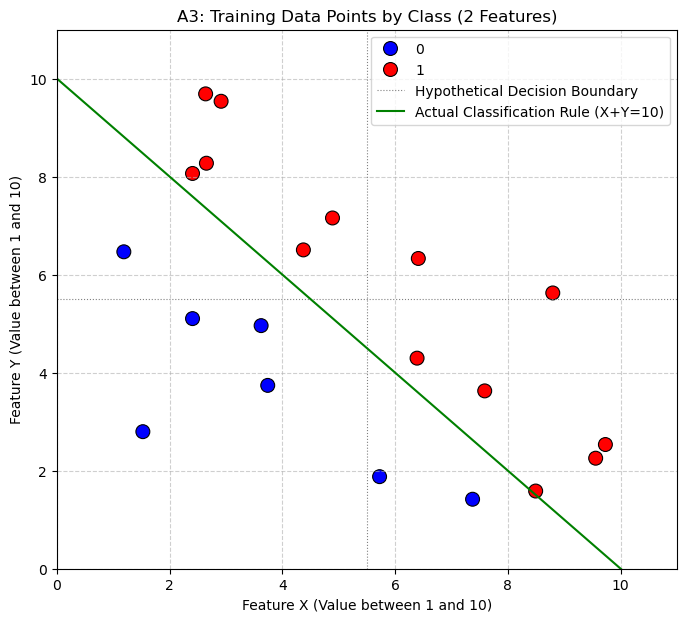


Observation from the plot:
The scatter plot shows 20 points distributed across the 2D plane (Feature X vs Feature Y).
Points are colored blue for Class 0 and red for Class 1.
The classification rule (X + Y > 10) creates a diagonal separation: points with higher sums of X and Y tend to be red (Class 1), while points with lower sums tend to be blue (Class 0).
You can visually observe how well the classes are separated by this simple rule.

END OF QUESTION A3



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("="*60)
print("STARTING QUESTION A3: GENERATE TRAINING DATA & PLOT")
print("="*60)


np.random.seed(42) 


feature_x = np.random.uniform(1, 10, 20)

feature_y = np.random.uniform(1, 10, 20)


df_train_a3 = pd.DataFrame({
    'Feature_X': feature_x,
    'Feature_Y': feature_y
})

print("Generated 20 data points (first 5 rows):")
print(df_train_a3.head())




df_train_a3['Class'] = ((df_train_a3['Feature_X'] + df_train_a3['Feature_Y']) > 10).astype(int)

print("\nData points with assigned classes (first 5 rows):")
print(df_train_a3.head())
print("\nClass distribution:")
print(df_train_a3['Class'].value_counts())


plt.figure(figsize=(8, 7))
sns.scatterplot(
    data=df_train_a3,
    x='Feature_X',
    y='Feature_Y',
    hue='Class', 
    palette={0: 'blue', 1: 'red'},
    s=100, 
    edgecolor='k', 
    marker='o' 
)
plt.title('A3: Training Data Points by Class (2 Features)')
plt.xlabel('Feature X (Value between 1 and 10)')
plt.ylabel('Feature Y (Value between 1 and 10)')
plt.xlim(0, 11) 
plt.ylim(0, 11) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Class', loc='upper left', labels=['Class 0 (Blue)', 'Class 1 (Red)'])
plt.axvline(x=5.5, color='gray', linestyle=':', linewidth=0.8, label='Hypothetical Decision Boundary')
plt.axhline(y=5.5, color='gray', linestyle=':', linewidth=0.8)

x_line = np.linspace(0, 11, 100)
y_line = 10 - x_line
plt.plot(x_line, y_line, color='green', linestyle='-', linewidth=1.5, label='Actual Classification Rule (X+Y=10)')
plt.legend()
plt.show()

print("\nObservation from the plot:")
print("The scatter plot shows 20 points distributed across the 2D plane (Feature X vs Feature Y).")
print("Points are colored blue for Class 0 and red for Class 1.")
print("The classification rule (X + Y > 10) creates a diagonal separation: points with higher sums of X and Y tend to be red (Class 1), while points with lower sums tend to be blue (Class 0).")
print("You can visually observe how well the classes are separated by this simple rule.")


print("\n" + "="*60)
print("END OF QUESTION A3")
print("="*60 + "\n")

--- Re-generating A3 Training Data for A4 ---
A3 Training data regenerated. Shape: (20, 3)
A3 Class distribution:
 Class
1    13
0     7
Name: count, dtype: int64

STARTING QUESTION A4: KNN CLASSIFICATION & BOUNDARY PLOT

Generated test set of 10201 points (about 10,000 points).
Test set head (first 5 rows):
    Feature_X  Feature_Y
0        0.0        0.0
1        0.1        0.0
2        0.2        0.0
3        0.3        0.0
4        0.4        0.0

kNN Classifier (k=3) trained and predictions made on the test grid.
Predicted class distribution on test grid:
 1    6109
0    4092
Name: count, dtype: int64


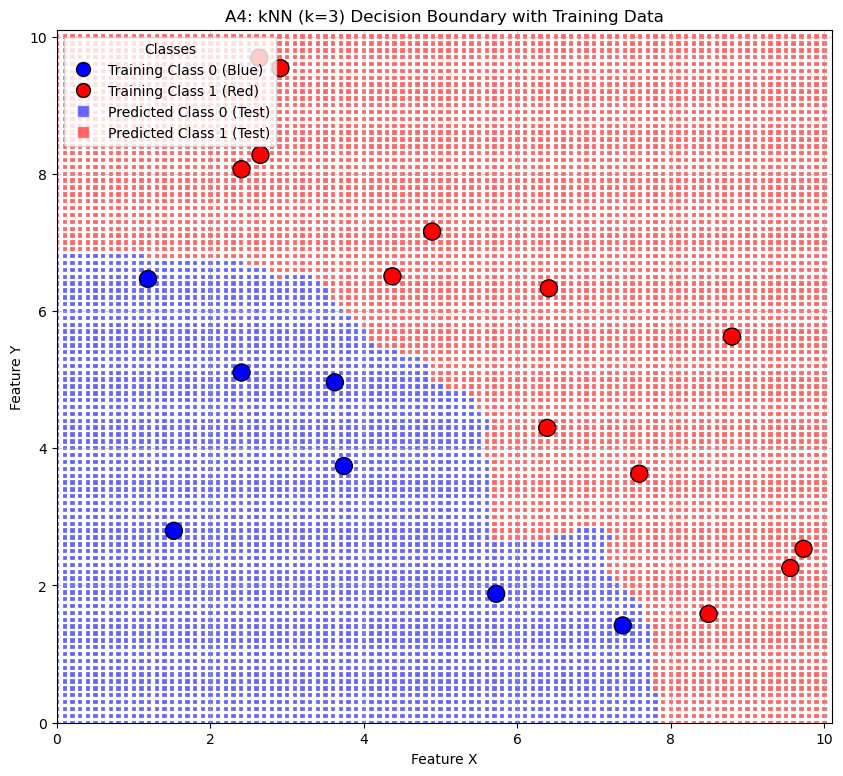


Observation from the plot:
The scatter plot of the test data (smaller square points) shows the regions classified by the kNN model.
The background is colored blue or red, indicating the predicted class for every point in the feature space.
The 'class boundary lines' are not sharp lines in kNN, but rather irregular, curved boundaries that emerge between the blue and red regions.
These boundaries are formed by the majority vote of the 3 nearest training neighbors.
You can see that the predicted regions tend to cluster around the original 20 training data points (larger circle points).
Points closer to the blue training points are predicted as blue, and points closer to the red training points are predicted as red.
The boundary appears somewhat 'jagged' or 'local' because kNN is a non-parametric, instance-based learner, heavily influenced by individual training points.

END OF QUESTION A4



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 


print("--- Re-generating A3 Training Data for A4 ---")
np.random.seed(42)
feature_x_a3 = np.random.uniform(1, 10, 20)
feature_y_a3 = np.random.uniform(1, 10, 20)
df_train_a3 = pd.DataFrame({
    'Feature_X': feature_x_a3,
    'Feature_Y': feature_y_a3
})
df_train_a3['Class'] = ((df_train_a3['Feature_X'] + df_train_a3['Feature_Y']) > 10).astype(int)
print("A3 Training data regenerated. Shape:", df_train_a3.shape)
print("A3 Class distribution:\n", df_train_a3['Class'].value_counts())



print("\n" + "="*60)
print("STARTING QUESTION A4: KNN CLASSIFICATION & BOUNDARY PLOT")
print("="*60)


x_grid = np.arange(0, 10.1, 0.1)
y_grid = np.arange(0, 10.1, 0.1)


xx, yy = np.meshgrid(x_grid, y_grid)

df_test_a4 = pd.DataFrame({
    'Feature_X': xx.ravel(),
    'Feature_Y': yy.ravel()
})

print(f"\nGenerated test set of {len(df_test_a4)} points (about 10,000 points).")
print("Test set head (first 5 rows):\n", df_test_a4.head())



X_train_a4 = df_train_a3[['Feature_X', 'Feature_Y']]
y_train_a4 = df_train_a3['Class']



knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_a4, y_train_a4)


y_test_pred_a4 = knn_model.predict(df_test_a4)

print("\nkNN Classifier (k=3) trained and predictions made on the test grid.")
print("Predicted class distribution on test grid:\n", pd.Series(y_test_pred_a4).value_counts())



plt.figure(figsize=(10, 9))
sns.scatterplot(
    x=df_test_a4['Feature_X'],
    y=df_test_a4['Feature_Y'],
    hue=y_test_pred_a4, # Color by predicted class
    palette={0: 'blue', 1: 'red'},
    s=10, # Smaller points for the dense grid
    alpha=0.6, # Transparency to see density
    marker='s', # Square markers for test points
    legend=False # Hide legend for test points of the test data
)


sns.scatterplot(
    x=df_train_a3['Feature_X'],
    y=df_train_a3['Feature_Y'],
    hue=df_train_a3['Class'], # Color by actual class
    palette={0: 'blue', 1: 'red'},
    s=150, # Larger points for training data
    edgecolor='black', # Black edge for distinction
    marker='o', # Circle markers for training points
    zorder=5 # Ensure training points are on top

)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Training Class 0 (Blue)', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Training Class 1 (Red)', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, alpha=0.6, label='Predicted Class 0 (Test)', markeredgecolor=None),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=8, alpha=0.6, label='Predicted Class 1 (Test)', markeredgecolor=None)
]
plt.legend(handles=legend_elements, title='Classes', loc='upper left')


plt.title('A4: kNN (k=3) Decision Boundary with Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.xlim(0, 10.1)
plt.ylim(0, 10.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


print("\nObservation from the plot:")
print("The scatter plot of the test data (smaller square points) shows the regions classified by the kNN model.")
print("The background is colored blue or red, indicating the predicted class for every point in the feature space.")
print("The 'class boundary lines' are not sharp lines in kNN, but rather irregular, curved boundaries that emerge between the blue and red regions.")
print("These boundaries are formed by the majority vote of the 3 nearest training neighbors.")
print("You can see that the predicted regions tend to cluster around the original 20 training data points (larger circle points).")
print("Points closer to the blue training points are predicted as blue, and points closer to the red training points are predicted as red.")
print("The boundary appears somewhat 'jagged' or 'local' because kNN is a non-parametric, instance-based learner, heavily influenced by individual training points.")


print("\n" + "="*60)
print("END OF QUESTION A4")
print("="*60 + "\n")

--- Re-generating A3 Training Data for A5 ---
A3 Training data regenerated. Shape: (20, 3)
--- Re-generating A4 Test Data Grid for A5 ---
A4 Test data grid regenerated. Shape: (10201, 2)

STARTING QUESTION A5: VARYING K IN KNN & OBSERVING BOUNDARIES

Testing kNN with various k values: [1, 3, 5, 10, 15]

--- Processing k = 1 ---
kNN (k=1) trained and predictions made.


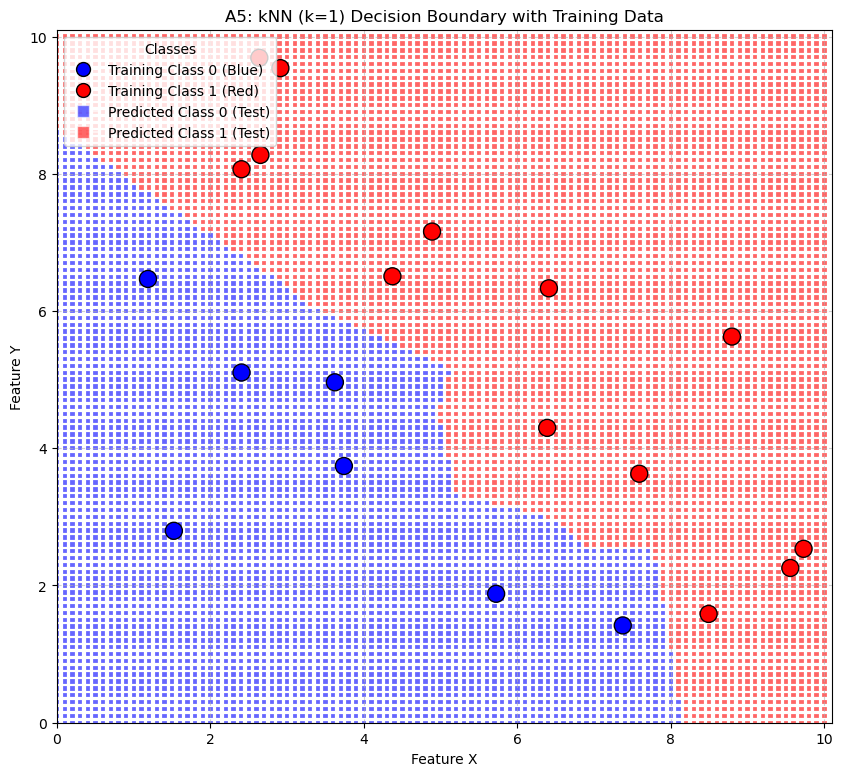


--- Processing k = 3 ---
kNN (k=3) trained and predictions made.


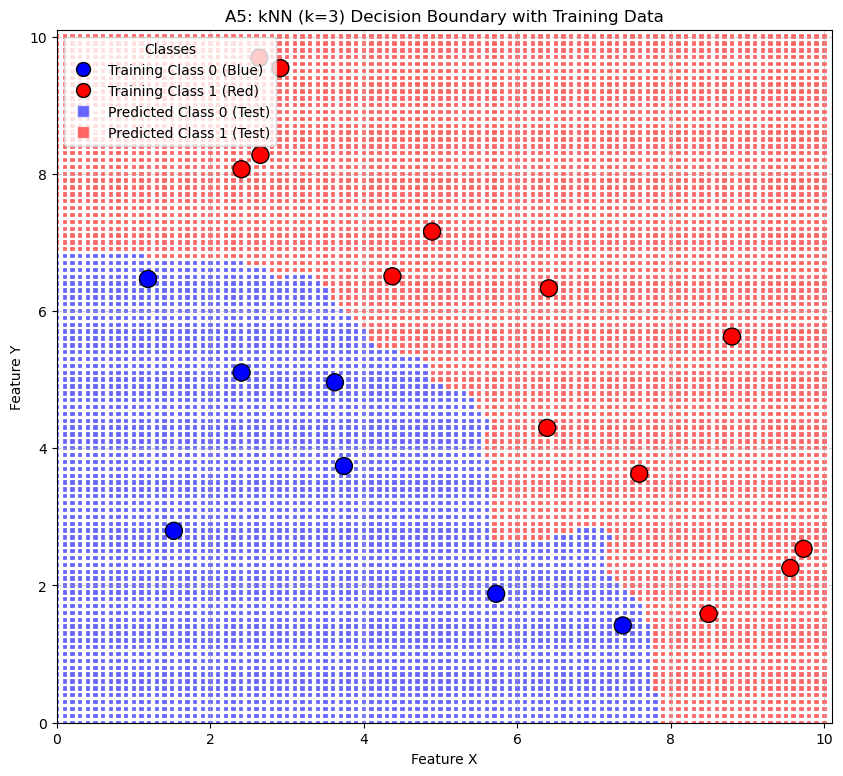


--- Processing k = 5 ---
kNN (k=5) trained and predictions made.


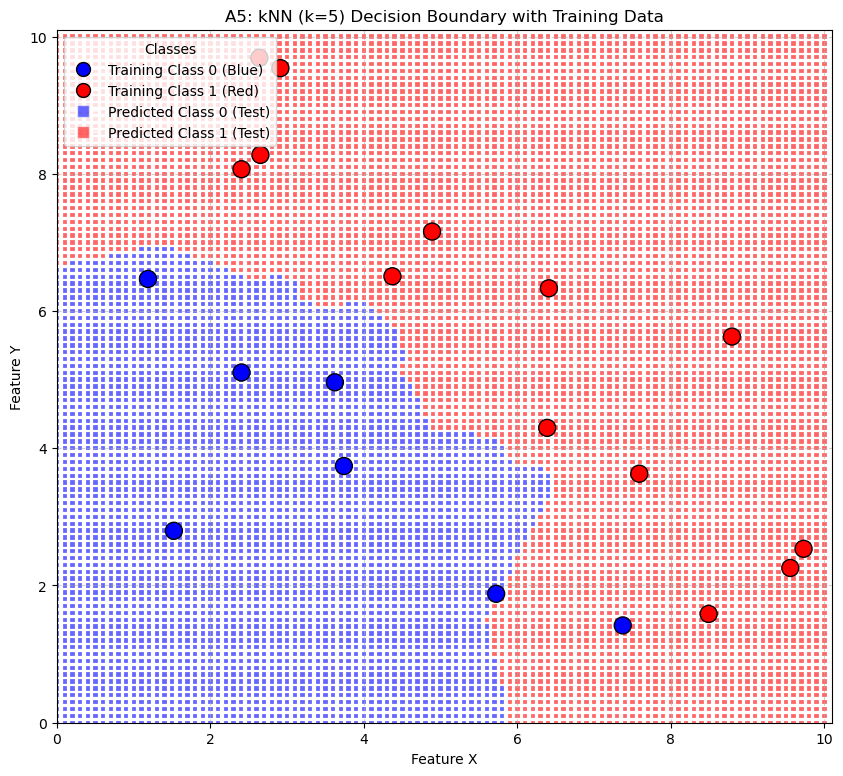


--- Processing k = 10 ---
kNN (k=10) trained and predictions made.


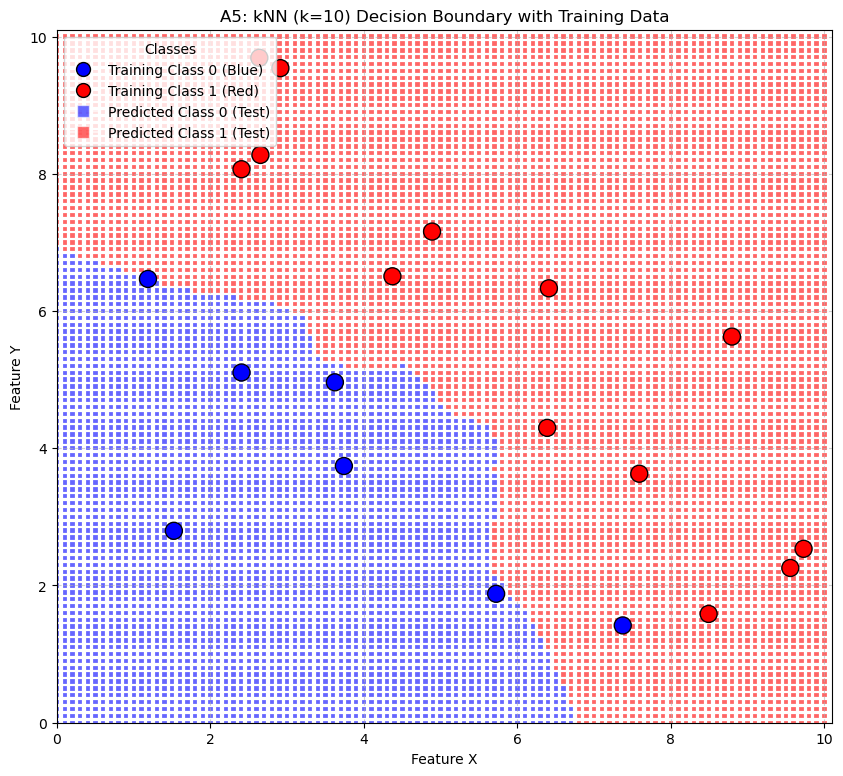


--- Processing k = 15 ---
kNN (k=15) trained and predictions made.


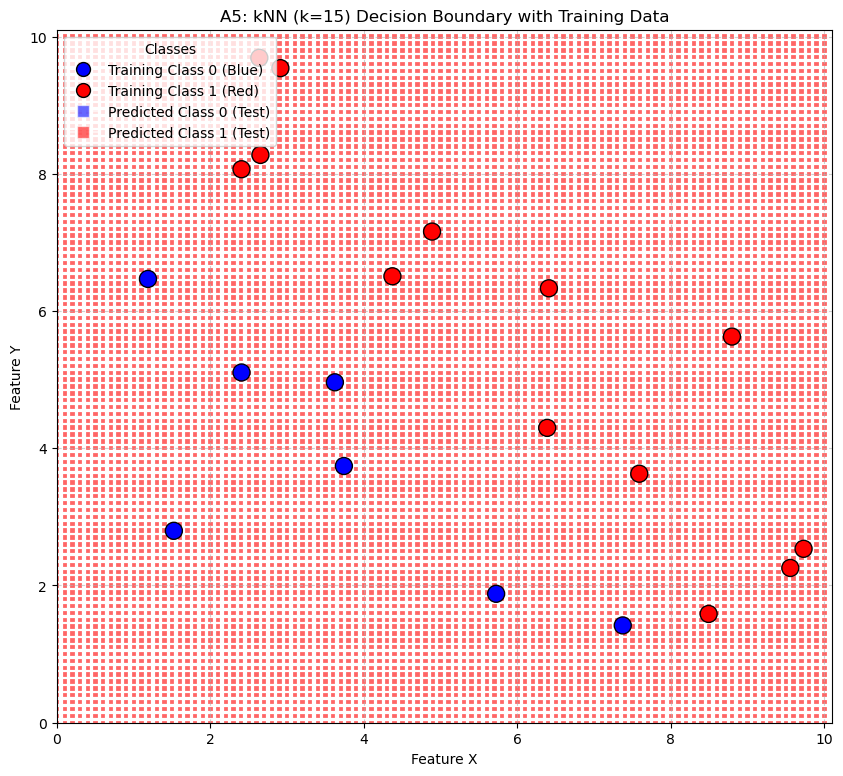


--- Observations on Class Boundary Changes with Varying k ---
As 'k' changes, the smoothness and complexity of the decision boundary changes:

- When k = 1 (1-NN):
  The decision boundary is highly irregular and 'noisy'. Each test point is classified based *only* on its single nearest neighbor. This leads to very local and sensitive boundaries, potentially overfitting to individual training points.
  You might see isolated islands of one color within a larger region of another, reflecting the influence of a single training point far from its general cluster.

- As k increases (e.g., k = 3, 5):
  The decision boundary becomes smoother. The model considers more neighbors for classification, which averages out the influence of individual noisy points. This helps to generalize better and create more robust, less 'wiggly' boundaries.
  The regions appear more coherent, and isolated islands tend to disappear.

- When k becomes very large (e.g., k = 10, 15, or even larger, approaching the to

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # Import kNN classifier


print("--- Re-generating A3 Training Data for A5 ---")
np.random.seed(42)
feature_x_a3 = np.random.uniform(1, 10, 20)
feature_y_a3 = np.random.uniform(1, 10, 20)
df_train_a3 = pd.DataFrame({
    'Feature_X': feature_x_a3,
    'Feature_Y': feature_y_a3
})
df_train_a3['Class'] = ((df_train_a3['Feature_X'] + df_train_a3['Feature_Y']) > 10).astype(int)
print("A3 Training data regenerated. Shape:", df_train_a3.shape)


print("--- Re-generating A4 Test Data Grid for A5 ---")
x_grid = np.arange(0, 10.1, 0.1)
y_grid = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_grid, y_grid)
df_test_a4 = pd.DataFrame({
    'Feature_X': xx.ravel(),
    'Feature_Y': yy.ravel()
})
print("A4 Test data grid regenerated. Shape:", df_test_a4.shape)

# Prepare Training Data for kNN Classifier
X_train_a5 = df_train_a3[['Feature_X', 'Feature_Y']]
y_train_a5 = df_train_a3['Class']



print("\n" + "="*60)
print("STARTING QUESTION A5: VARYING K IN KNN & OBSERVING BOUNDARIES")
print("="*60)

# Define various values of k to test
k_values = [1, 3, 5, 10, 15] # You can add or change these values

print(f"\nTesting kNN with various k values: {k_values}")

for k in k_values:
    print(f"\n--- Processing k = {k} ---")
    knn_model_a5 = KNeighborsClassifier(n_neighbors=k)
    knn_model_a5.fit(X_train_a5, y_train_a5)
    y_test_pred_a5 = knn_model_a5.predict(df_test_a4)

    print(f"kNN (k={k}) trained and predictions made.")

    # Plotting the decision boundary for the current k
    plt.figure(figsize=(10, 9))
    sns.scatterplot(
        x=df_test_a4['Feature_X'],
        y=df_test_a4['Feature_Y'],
        hue=y_test_pred_a5,
        palette={0: 'blue', 1: 'red'},
        s=10,
        alpha=0.6,
        marker='s',
        legend=False
    )

    # Overlay the original training data points
    sns.scatterplot(
        x=df_train_a3['Feature_X'],
        y=df_train_a3['Feature_Y'],
        hue=df_train_a3['Class'],
        palette={0: 'blue', 1: 'red'},
        s=150,
        edgecolor='black',
        marker='o',
        zorder=5
    )

    # Custom legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Training Class 0 (Blue)', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Training Class 1 (Red)', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, alpha=0.6, label='Predicted Class 0 (Test)', markeredgecolor=None),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=8, alpha=0.6, label='Predicted Class 1 (Test)', markeredgecolor=None)
    ]
    plt.legend(handles=legend_elements, title='Classes', loc='upper left')

    plt.title(f'A5: kNN (k={k}) Decision Boundary with Training Data')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.xlim(0, 10.1)
    plt.ylim(0, 10.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Observations on change in class boundary lines ---
print("\n--- Observations on Class Boundary Changes with Varying k ---")
print("As 'k' changes, the smoothness and complexity of the decision boundary changes:")
print("\n- When k = 1 (1-NN):")
print("  The decision boundary is highly irregular and 'noisy'. Each test point is classified based *only* on its single nearest neighbor. This leads to very local and sensitive boundaries, potentially overfitting to individual training points.")
print("  You might see isolated islands of one color within a larger region of another, reflecting the influence of a single training point far from its general cluster.")

print("\n- As k increases (e.g., k = 3, 5):")
print("  The decision boundary becomes smoother. The model considers more neighbors for classification, which averages out the influence of individual noisy points. This helps to generalize better and create more robust, less 'wiggly' boundaries.")
print("  The regions appear more coherent, and isolated islands tend to disappear.")

print("\n- When k becomes very large (e.g., k = 10, 15, or even larger, approaching the total number of training points):")
print("  The boundary becomes even smoother, and might eventually become almost linear or very simplistic. If 'k' is too large, the model might start to **underfit** the data because it's considering too many distant neighbors, diluting the local information. It might tend to classify most points into the majority class of the entire dataset if the classes are imbalanced, or create very broad regions.")
print("  The model loses its ability to capture fine-grained patterns in the data.")

print("\nIn summary:")
print("  - Small k (e.g., k=1): High variance, low bias (prone to overfitting, complex boundary).")
print("  - Large k (e.g., k=15+): Low variance, high bias (prone to underfitting, simple/smooth boundary).")
print("  - Intermediate k values (e.g., k=3, 5): Often provide the best balance between bias and variance, leading to a good generalization (smoother but still captures patterns).")

print("\n" + "="*60)
print("END OF QUESTION A5")
print("="*60 + "\n")

In [7]:
import os
import pandas as pd


mental_health_filename = 'Mental Health Dataset.csv'


current_directory = os.getcwd()
print(f"1. Your current working directory is: '{current_directory}'")


print("\n2. Files and folders in the current directory:")
try:
    for item in os.listdir(current_directory):
        print(f"   - {item}")
except Exception as e:
    print(f"   Error listing directory contents: {e}")


full_path_to_check = os.path.join(current_directory, mental_health_filename)

file_exists = os.path.exists(full_path_to_check)
print(f"\n3. Does the file '{full_path_to_check}' exist in the current directory? {file_exists}")

if not file_exists:
    print("\n   ACTION REQUIRED: The file does NOT exist at this exact path.")
    print("   Please do one of the following:")
    print(f"   a) **Move** the '{mental_health_filename}' file directly into your current working directory (listed above).")
    print("   b) If the file is in a subfolder (e.g., 'data' folder), update the path like this: `mental_health_file = 'data/Mental Health Dataset.csv'`")
 
    print(r"   c) If the file is elsewhere (e.g., Downloads), find its full path and update the variable: `mental_health_file = r'C:\Users\YourUser\Downloads\Mental Health Dataset.csv'`")
    print("   d) **Carefully check the spelling, spacing, and capitalization** of the file name. It MUST match exactly.")
    print("      If you're unsure, rename the file on your computer to something very simple like `mh_data.csv` and use that name in the code.")
else:
    print(f"\n   The file '{mental_health_filename}' IS found. Attempting to read it...")
    try:
        df_test = pd.read_csv(full_path_to_check)
        print(f"   Successfully read the file. DataFrame shape: {df_test.shape}")
        print(f"   DataFrame columns: {df_test.columns.tolist()}")
    except Exception as e:
        print(f"   ERROR: Could not read the file even though it exists. Reason: {e}")
        print("   This might indicate a corrupted file or an unexpected file format.")

1. Your current working directory is: 'C:\Users\Manasa Gayathri'

2. Files and folders in the current directory:
   - .anaconda
   - .bashrc
   - .bash_history
   - .bash_profile
   - .cache
   - .conda
   - .condarc
   - .continuum
   - .eclipse
   - .groovy
   - .ipynb_checkpoints
   - .ipython
   - .jenkins
   - .jupyter
   - .m2
   - .matplotlib
   - .ms-ad
   - .p2
   - .sts4
   - .vscode
   - .wget-hsts
   - anaconda3
   - anomalies.csv
   - anomalies.npz
   - AppData
   - Application Data
   - bl.en.u4cse23217.ipynb
   - cleaned.ipynb
   - Contacts
   - Cookies
   - cse23217.ipynb
   - Desktop
   - Documents
   - Downloads
   - Dropbox
   - eclipse
   - Favorites
   - final_ensemble_model.pkl
   - final_model.pkl
   - isolation_forest_model.pkl
   - LAB2.ipynb
   - LAB3.ipynb
   - lab4.ipynb
   - Links
   - Local Settings
   - Mental Health Dataset.csv
   - Music
   - My Documents
   - NetHood
   - NTUSER.DAT
   - ntuser.dat.LOG1
   - ntuser.dat.LOG2
   - NTUSER.DAT{96f23b78-e18

STARTING QUESTION A6: A3-A5 REPEATED FOR PROJECT DATA
Dataset 'Mental Health Dataset.csv' loaded successfully for A6.

Project Data (features and target) preprocessed for A6.
Full preprocessed project data shape: (292364, 2), (292364,)

Simulating A3: Sampled 20 training points from project data.
Sampled training data (first 5 rows):
         Days_Indoors_encoded  Growing_Stress_encoded
236749              3.000000                       2
281544              1.984035                       2
175020              1.984035                       0
273119              3.000000                       1
258005              1.000000                       0
Sampled training class distribution:
 treatment
0    16
1     4
Name: count, dtype: int64

Simulating A4: Generated test grid of 484 points for project data.

Simulating A4 & A5: Testing kNN with various k values on project data: [1, 3, 5, 10, 15]

--- Processing k = 1 for Project Data ---


C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_11968\405416057.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_project_a6['treatment'].fillna(df_project_a6['treatment'].mode()[0], inplace=True)
C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_11968\405416057.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

kNN (k=1) trained and predictions made on project data grid.


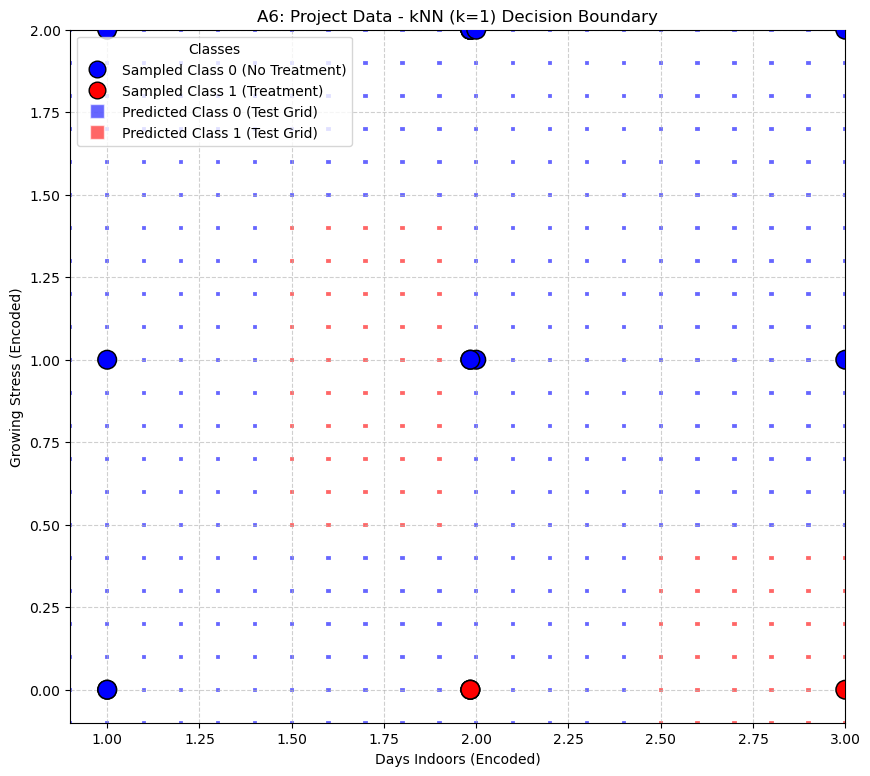


--- Processing k = 3 for Project Data ---
kNN (k=3) trained and predictions made on project data grid.


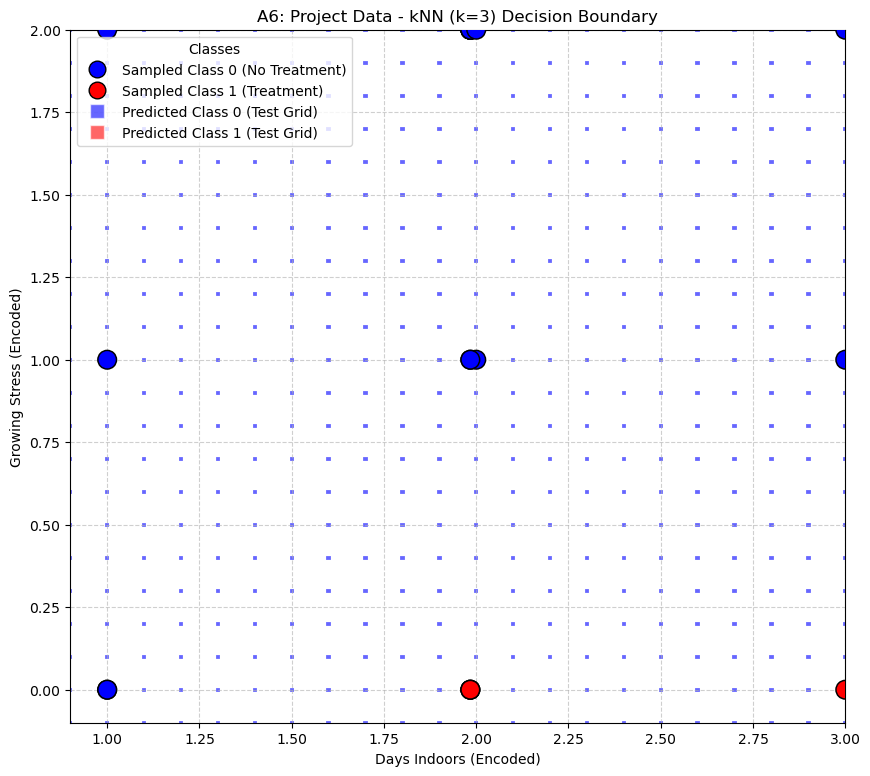


--- Processing k = 5 for Project Data ---
kNN (k=5) trained and predictions made on project data grid.


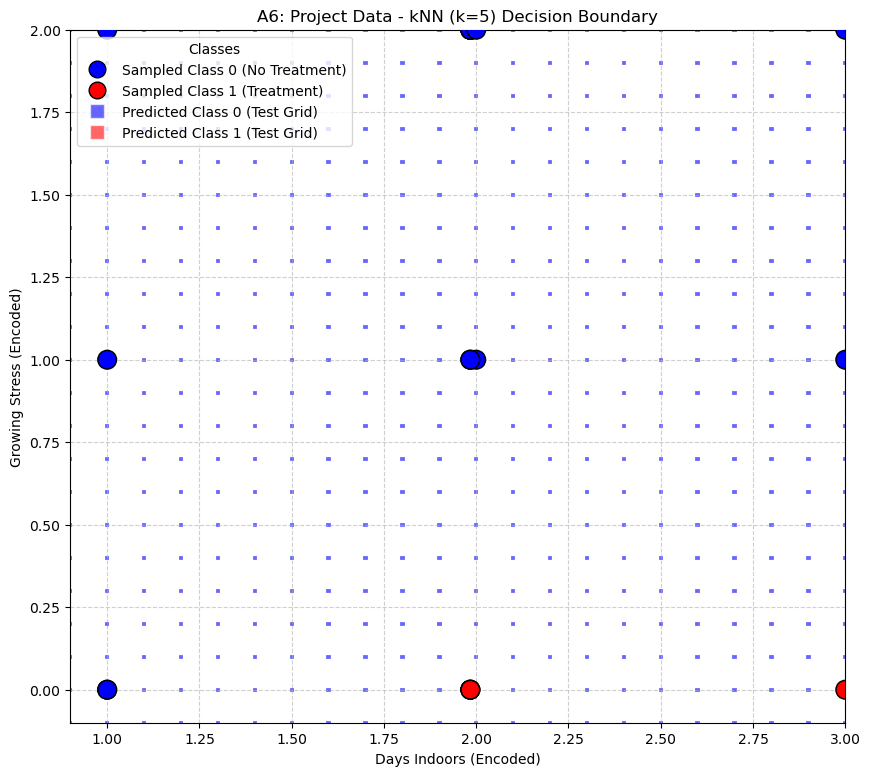


--- Processing k = 10 for Project Data ---
kNN (k=10) trained and predictions made on project data grid.


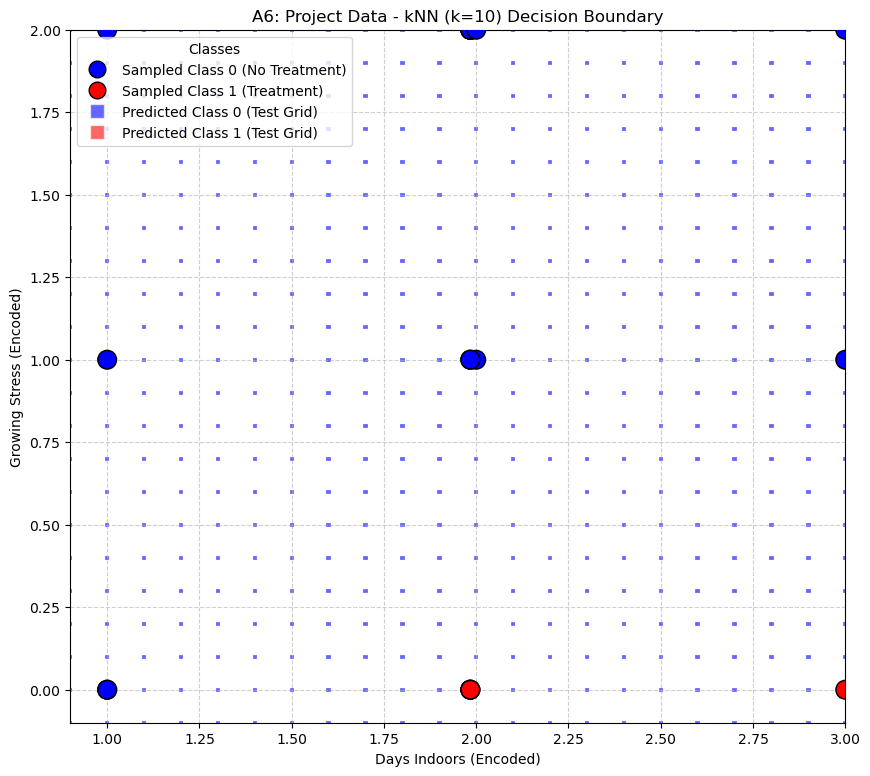


--- Processing k = 15 for Project Data ---
kNN (k=15) trained and predictions made on project data grid.


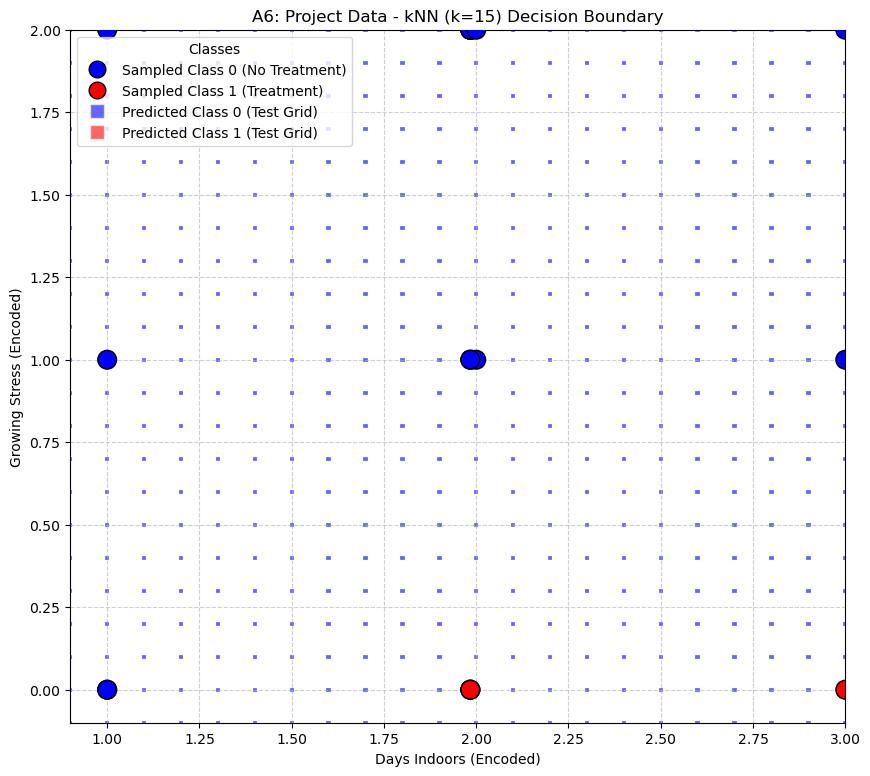


--- A6 Observations on Class Boundary Changes for Project Data ---
When applying kNN to your project data (using sampled points and selected features), similar patterns to A5 are expected:
- **Small k (e.g., k=1):** The decision boundaries will be highly sensitive to individual sampled training points. You'll likely see very irregular, 'noisy' boundaries, potentially capturing minor variations or outliers in the small sample.
- **Increasing k (e.g., k=3, 5):** The boundaries should become smoother. As more neighbors are considered, the influence of individual points lessens, leading to more generalized and stable classification regions.
- **Large k (e.g., k=10, 15):** The boundaries will become even smoother and simpler. If 'k' is too large relative to the number of sampled training points, the model might oversimplify the patterns, potentially leading to **underfitting** or a very broad classification that doesn't capture nuanced differences in your data.
The visual comparison of the

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Used for splitting for kNN training (sampling)


print("="*60)
print("STARTING QUESTION A6: A3-A5 REPEATED FOR PROJECT DATA")
print("="*60)


mental_health_file = 'Mental Health Dataset.csv' 


try:
    df_mh_a6 = pd.read_csv(mental_health_file)
    print(f"Dataset '{mental_health_file}' loaded successfully for A6.")
except FileNotFoundError:
    print(f"CRITICAL ERROR for A6: '{mental_health_file}' not found. Please ensure the path is correct.")
    print("Skipping A6.")
    exit() 
selected_columns_a6 = ['Days_Indoors', 'Growing_Stress', 'treatment']
if not all(col in df_mh_a6.columns for col in selected_columns_a6):
    missing_cols = [col for col in selected_columns_a6 if col not in df_mh_a6.columns]
    print(f"Error for A6: Missing required columns in dataset: {missing_cols}.")
    print(f"Available columns are: {df_mh_a6.columns.tolist()}")
    print("Skipping A6. Please ensure the selected features/target exist in your file.")
    exit()

df_project_a6 = df_mh_a6[selected_columns_a6].copy()



# Target: 'treatment' (Yes=1, No=0)
df_project_a6['treatment'] = df_project_a6['treatment'].map({'Yes': 1, 'No': 0})
df_project_a6['treatment'].fillna(df_project_a6['treatment'].mode()[0], inplace=True)


days_indoors_mapping = {'1-14 days': 1, '15-30 days': 2, '31-60 days': 3, '61-90 days': 4, '90+ days': 5}
df_project_a6['Days_Indoors_encoded'] = df_project_a6['Days_Indoors'].map(days_indoors_mapping)
df_project_a6['Days_Indoors_encoded'].fillna(df_project_a6['Days_Indoors_encoded'].mean(), inplace=True)

stress_mapping = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_project_a6['Growing_Stress_encoded'] = df_project_a6['Growing_Stress'].map(stress_mapping)
df_project_a6['Growing_Stress_encoded'].fillna(df_project_a6['Growing_Stress_encoded'].mean(), inplace=True)

# Drop original categorical columns now that they are encoded
df_project_a6.drop(columns=['Days_Indoors', 'Growing_Stress'], inplace=True)

# Define X and y for the project data (using the encoded features)
X_project_all = df_project_a6[['Days_Indoors_encoded', 'Growing_Stress_encoded']]
y_project_all = df_project_a6['treatment']

# Final check for any remaining NaNs in X_project_all
X_project_all.fillna(X_project_all.mean(), inplace=True)

print("\nProject Data (features and target) preprocessed for A6.")
print(f"Full preprocessed project data shape: {X_project_all.shape}, {y_project_all.shape}")



if len(X_project_all) < 20:
    print("Warning: Dataset has fewer than 20 points. Using all available points as training sample for A6.")
    X_train_a6_sample = X_project_all.copy()
    y_train_a6_sample = y_project_all.copy()
else:
    # Randomly sample 20 indices
    np.random.seed(42) # For reproducibility of the sample
    sample_indices = np.random.choice(X_project_all.index, 20, replace=False)
    X_train_a6_sample = X_project_all.loc[sample_indices].copy()
    y_train_a6_sample = y_project_all.loc[sample_indices].copy()

print(f"\nSimulating A3: Sampled {len(X_train_a6_sample)} training points from project data.")
print("Sampled training data (first 5 rows):\n", X_train_a6_sample.head())
print("Sampled training class distribution:\n", y_train_a6_sample.value_counts())


x_min, x_max = X_project_all['Days_Indoors_encoded'].min(), X_project_all['Days_Indoors_encoded'].max()
y_min, y_max = X_project_all['Growing_Stress_encoded'].min(), X_project_all['Growing_Stress_encoded'].max()

# Extend range slightly beyond min/max for better visualization of boundaries
x_grid_a6 = np.arange(x_min - 0.1, x_max + 0.1, 0.1)
y_grid_a6 = np.arange(y_min - 0.1, y_max + 0.1, 0.1)

xx_a6, yy_a6 = np.meshgrid(x_grid_a6, y_grid_a6)

df_test_a6_grid = pd.DataFrame({
    'Days_Indoors_encoded': xx_a6.ravel(),
    'Growing_Stress_encoded': yy_a6.ravel()
})

print(f"\nSimulating A4: Generated test grid of {len(df_test_a6_grid)} points for project data.")

# --- Simulate A4 & A5: kNN Classification and Plotting for Various k ---
k_values_a6 = [1, 3, 5, 10, 15] # Various k values to test and observe

print(f"\nSimulating A4 & A5: Testing kNN with various k values on project data: {k_values_a6}")

for k in k_values_a6:
    print(f"\n--- Processing k = {k} for Project Data ---")
    knn_model_a6 = KNeighborsClassifier(n_neighbors=k)
    knn_model_a6.fit(X_train_a6_sample, y_train_a6_sample)
    y_test_pred_a6 = knn_model_a6.predict(df_test_a6_grid)

    print(f"kNN (k={k}) trained and predictions made on project data grid.")

    plt.figure(figsize=(10, 9))
    sns.scatterplot(
        x=df_test_a6_grid['Days_Indoors_encoded'],
        y=df_test_a6_grid['Growing_Stress_encoded'],
        hue=y_test_pred_a6,
        palette={0: 'blue', 1: 'red'},
        s=10, # Smaller points for the dense grid
        alpha=0.6, # Transparency
        marker='s', # Square markers
        legend=False # Hide seaborn's default legend
    )

    # Overlay the original sampled training data points
    sns.scatterplot(
        x=X_train_a6_sample['Days_Indoors_encoded'],
        y=X_train_a6_sample['Growing_Stress_encoded'],
        hue=y_train_a6_sample,
        palette={0: 'blue', 1: 'red'},
        s=180, # Larger points for the sampled training data
        edgecolor='black', # Black edge for distinction
        marker='o', # Circle markers
        zorder=5 # Ensure training points are on top
    )

    # Create a custom legend for clarity
    legend_elements_a6 = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=12, label='Sampled Class 0 (No Treatment)', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=12, label='Sampled Class 1 (Treatment)', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, alpha=0.6, label='Predicted Class 0 (Test Grid)', markeredgecolor=None),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, alpha=0.6, label='Predicted Class 1 (Test Grid)', markeredgecolor=None)
    ]
    plt.legend(handles=legend_elements_a6, title='Classes', loc='upper left')

    plt.title(f'A6: Project Data - kNN (k={k}) Decision Boundary')
    plt.xlabel('Days Indoors (Encoded)')
    plt.ylabel('Growing Stress (Encoded)')
    plt.xlim(x_grid_a6.min(), x_grid_a6.max())
    plt.ylim(y_grid_a6.min(), y_grid_a6.max())
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n--- A6 Observations on Class Boundary Changes for Project Data ---")
print("When applying kNN to your project data (using sampled points and selected features), similar patterns to A5 are expected:")
print("- **Small k (e.g., k=1):** The decision boundaries will be highly sensitive to individual sampled training points. You'll likely see very irregular, 'noisy' boundaries, potentially capturing minor variations or outliers in the small sample.")
print("- **Increasing k (e.g., k=3, 5):** The boundaries should become smoother. As more neighbors are considered, the influence of individual points lessens, leading to more generalized and stable classification regions.")
print("- **Large k (e.g., k=10, 15):** The boundaries will become even smoother and simpler. If 'k' is too large relative to the number of sampled training points, the model might oversimplify the patterns, potentially leading to **underfitting** or a very broad classification that doesn't capture nuanced differences in your data.")
print("The visual comparison of these plots helps understand the bias-variance trade-off in kNN on your specific project data.")

print("\n" + "="*60)
print("END OF QUESTION A6")
print("="*60 + "\n")

STARTING QUESTION A7: HYPERPARAMETER TUNING FOR KNN
Dataset 'Mental Health Dataset.csv' loaded successfully for A7.


C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_11968\2322036984.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mh_a7[target_mh_column_a7].fillna(df_mh_a7[target_mh_column_a7].mode()[0], inplace=True)
C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_11968\2322036984.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 


Shape of X (A7 - Preprocessed): (292364, 23)
Shape of y (A7 - Preprocessed): (292364,)
Data split into training and test sets for A7.

Starting GridSearchCV to find the ideal 'k'...
Fitting 5 folds for each of 11 candidates, totalling 55 fits
GridSearchCV complete.

--- A7 GridSearchCV Results ---
Best 'k' value found: 21
Best cross-validation accuracy (mean over folds): 0.6743

Evaluating the best kNN model on the unseen test set...
Accuracy on Test Set (with best k=21): 0.6757
Precision on Test Set: 0.6672
Recall on Test Set: 0.7137
F1-Score on Test Set: 0.6897

Confusion Matrix (Test Set) for Best kNN Model:
 [[27661 15767]
 [12677 31605]]


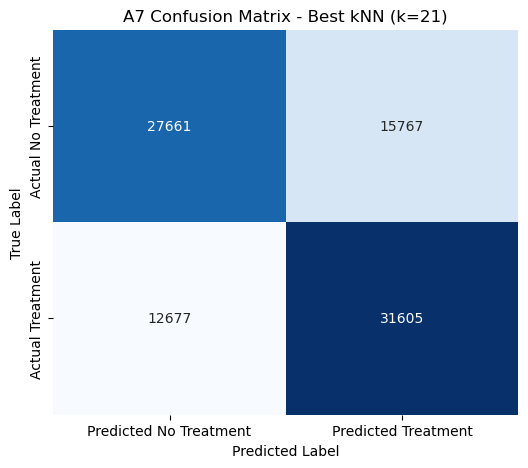


--- A7 Analysis of Ideal 'k' Value ---
The `GridSearchCV` operation found the ideal 'k' (n_neighbors) to be: 21.
This 'ideal' k is the value that resulted in the highest average cross-validation accuracy on the training data.

Implications of the ideal 'k' value:
  - A larger 'k' value (e.g., 10+) suggests that the optimal decision boundary is smoother, and the model benefits from considering a wider neighborhood of points. This generally reduces the impact of noise and helps with generalization (lower variance, higher bias), but if too large, it might oversimplify the boundary (underfit).

The best kNN model (with k=21) achieved an accuracy of 0.6757 on the unseen test set.
This indicates how well the optimized kNN model performs on new data for your mental health classification problem.

END OF QUESTION A7



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier # Import kNN classifier
from sklearn.preprocessing import StandardScaler # For scaling features
from sklearn.pipeline import Pipeline # To create a preprocessing + model pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


print("="*60)
print("STARTING QUESTION A7: HYPERPARAMETER TUNING FOR KNN")
print("="*60)


mental_health_file_a7 = 'Mental Health Dataset.csv'
try:
    df_mh_a7 = pd.read_csv(mental_health_file_a7)
    print(f"Dataset '{mental_health_file_a7}' loaded successfully for A7.")
except FileNotFoundError:
    print(f"CRITICAL ERROR for A7: '{mental_health_file_a7}' not found. Please ensure it's in the same directory.")
    print("Skipping A7.")
    exit()

# Target: 'treatment' (Yes=1, No=0)
target_mh_column_a7 = 'treatment'
df_mh_a7[target_mh_column_a7] = df_mh_a7[target_mh_column_a7].map({'Yes': 1, 'No': 0})
df_mh_a7[target_mh_column_a7].fillna(df_mh_a7[target_mh_column_a7].mode()[0], inplace=True)
y_a7 = df_mh_a7[target_mh_column_a7]

# Features (similar to A1, with mapping and handling of non-numeric data)
features_to_consider_a7 = [
    'Gender', 'Occupation', 'self_employed', 'family_history',
    'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
    'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options'
]

df_processed_a7 = df_mh_a7[features_to_consider_a7].copy()

# Mapping ordinal-like features
days_indoors_mapping = {'1-14 days': 1, '15-30 days': 2, '31-60 days': 3, '61-90 days': 4, '90+ days': 5}
if 'Days_Indoors' in df_processed_a7.columns:
    df_processed_a7['Days_Indoors_encoded'] = df_processed_a7['Days_Indoors'].map(days_indoors_mapping)
    df_processed_a7.drop('Days_Indoors', axis=1, inplace=True)

stress_mapping = {'No': 0, 'Maybe': 1, 'Yes': 2}
if 'Growing_Stress' in df_processed_a7.columns:
    df_processed_a7['Growing_Stress_encoded'] = df_processed_a7['Growing_Stress'].map(stress_mapping)
    df_processed_a7.drop('Growing_Stress', axis=1, inplace=True)

mood_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
if 'Mood_Swings' in df_processed_a7.columns:
    df_processed_a7['Mood_Swings_encoded'] = df_processed_a7['Mood_Swings'].map(mood_mapping)
    df_processed_a7.drop('Mood_Swings', axis=1, inplace=True)

# Identify remaining categorical for OHE and fill NaNs
categorical_for_ohe_a7 = []
for col in df_processed_a7.columns:
    if df_processed_a7[col].dtype == 'object':
        categorical_for_ohe_a7.append(col)
        df_processed_a7[col].fillna(df_processed_a7[col].mode()[0], inplace=True) # Fill NaNs before OHE

# One-hot encode remaining categorical features
X_a7 = pd.get_dummies(df_processed_a7, columns=categorical_for_ohe_a7, drop_first=True)

# Fill NaNs for any numerical columns that might have appeared due to mapping issues or original NaNs
X_a7.fillna(X_a7.mean(), inplace=True)

print(f"\nShape of X (A7 - Preprocessed): {X_a7.shape}")
print(f"Shape of y (A7 - Preprocessed): {y_a7.shape}")

if X_a7.empty or y_a7.empty:
    print("Error: X or y for A7 is empty after preprocessing. Skipping A7.")
    exit()

# --- 2. Split Data for Tuning and Final Evaluation ---
# Split the data into training and test sets (70% train, 30% test)
X_train_a7, X_test_a7, y_train_a7, y_test_a7 = train_test_split(X_a7, y_a7, test_size=0.3, random_state=42, stratify=y_a7)
print("Data split into training and test sets for A7.")



pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale features
    ('knn', KNeighborsClassifier())     # Step 2: K-NN classifier
])


param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21] # Values for 'k' to test
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric to optimize
    n_jobs=-1,            # Use all available CPU cores
    verbose=1             # Print progress messages
)

print("\nStarting GridSearchCV to find the ideal 'k'...")
grid_search.fit(X_train_a7, y_train_a7)

print("GridSearchCV complete.")

# --- 5. Retrieve the Best Parameters and Score ---
print("\n--- A7 GridSearchCV Results ---")
print(f"Best 'k' value found: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Best cross-validation accuracy (mean over folds): {grid_search.best_score_:.4f}")





best_knn_model = grid_search.best_estimator_
print("\nEvaluating the best kNN model on the unseen test set...")

y_test_pred_best_knn = best_knn_model.predict(X_test_a7)

print(f"Accuracy on Test Set (with best k={grid_search.best_params_['knn__n_neighbors']}): {accuracy_score(y_test_a7, y_test_pred_best_knn):.4f}")
print(f"Precision on Test Set: {precision_score(y_test_a7, y_test_pred_best_knn):.4f}")
print(f"Recall on Test Set: {recall_score(y_test_a7, y_test_pred_best_knn):.4f}")
print(f"F1-Score on Test Set: {f1_score(y_test_a7, y_test_pred_best_knn):.4f}")

# Confusion Matrix for the best model on test set
cm_best_knn = confusion_matrix(y_test_a7, y_test_pred_best_knn)
print("\nConfusion Matrix (Test Set) for Best kNN Model:\n", cm_best_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'],
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.title(f'A7 Confusion Matrix - Best kNN (k={grid_search.best_params_["knn__n_neighbors"]})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- 7. Analyze the Ideal 'k' Value ---
print("\n--- A7 Analysis of Ideal 'k' Value ---")
print(f"The `GridSearchCV` operation found the ideal 'k' (n_neighbors) to be: {grid_search.best_params_['knn__n_neighbors']}.")
print("This 'ideal' k is the value that resulted in the highest average cross-validation accuracy on the training data.")
print("\nImplications of the ideal 'k' value:")
if grid_search.best_params_['knn__n_neighbors'] == 1:
    print("  - A 'k' of 1 indicates the model is highly sensitive to individual training points (high variance, low bias). This can lead to overfitting on noisy data, but might capture complex local patterns if the data is clean.")
elif grid_search.best_params_['knn__n_neighbors'] > 1 and grid_search.best_params_['knn__n_neighbors'] < 10: # Example range
    print("  - An intermediate 'k' value (like 3, 5, or 7) often represents a good balance between capturing local patterns and generalizing well. It provides a smoother decision boundary than k=1 by considering a small neighborhood of points.")
else: # Larger k
    print("  - A larger 'k' value (e.g., 10+) suggests that the optimal decision boundary is smoother, and the model benefits from considering a wider neighborhood of points. This generally reduces the impact of noise and helps with generalization (lower variance, higher bias), but if too large, it might oversimplify the boundary (underfit).")

print(f"\nThe best kNN model (with k={grid_search.best_params_['knn__n_neighbors']}) achieved an accuracy of {accuracy_score(y_test_a7, y_test_pred_best_knn):.4f} on the unseen test set.")
print("This indicates how well the optimized kNN model performs on new data for your mental health classification problem.")

print("\n" + "="*60)
print("END OF QUESTION A7")
print("="*60 + "\n")